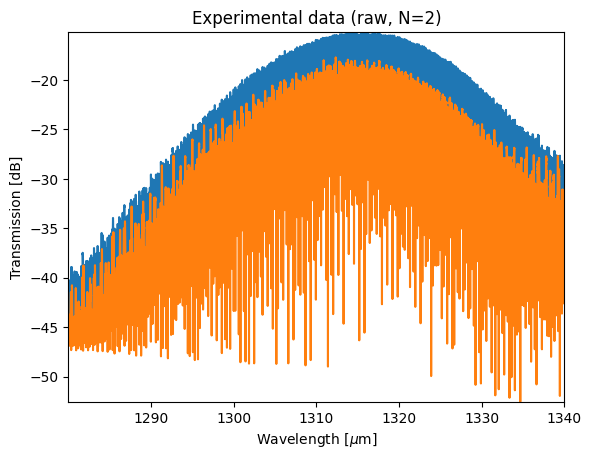

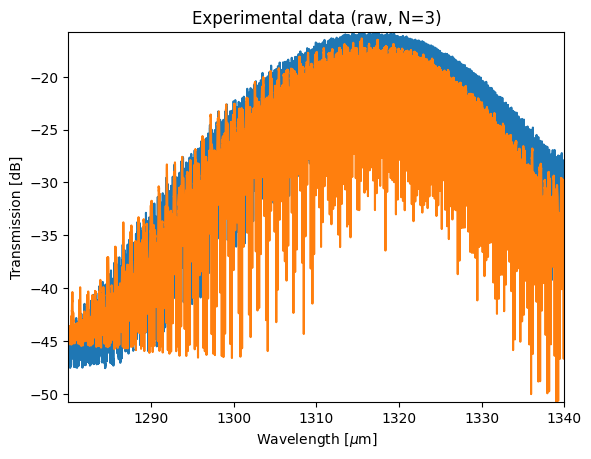

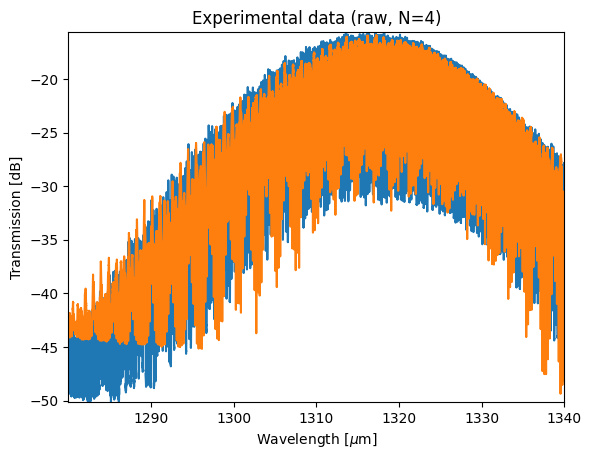

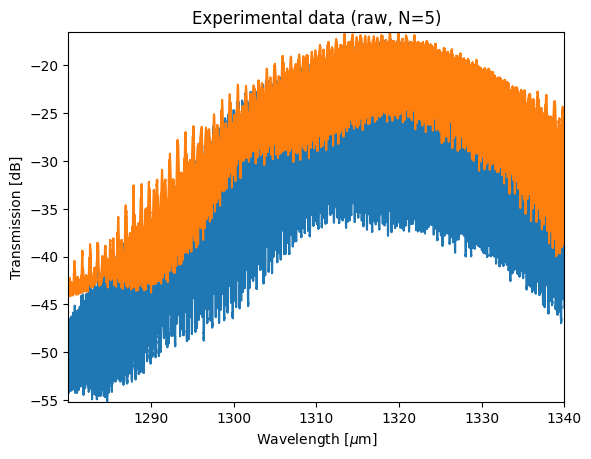

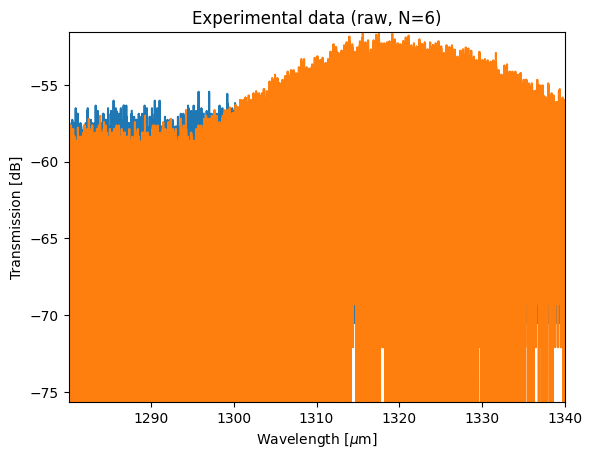

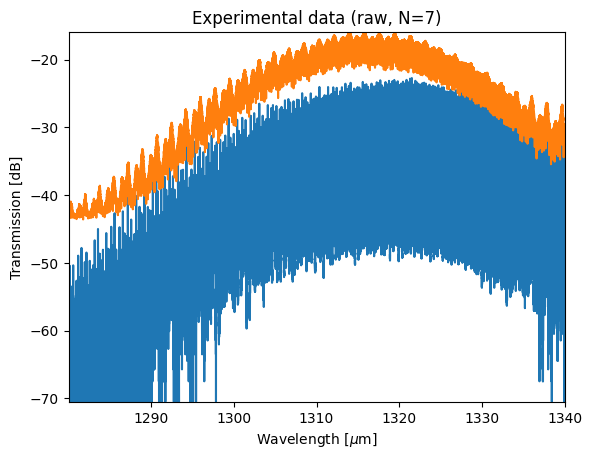

145555.55555555556
145555.55555555556


In [60]:
'''
Plot the raw data from 6 Fabry-Perot cavities
'''


#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 29 09:50:12 2022

@author: lukasc
"""

from scipy.io import loadmat        # used to load MATLAB data files
import matplotlib.pyplot as plt     # used to plot data

FileNames =[
            'lukasc_BraggHole2/29-Mar-2022 01.54.33_1.mat',
            'lukasc_BraggHole3/29-Mar-2022 02.07.24_1.mat',
            'lukasc_BraggHole4/29-Mar-2022 02.04.51_1.mat',
            'lukasc_BraggHole5/29-Mar-2022 02.02.18_1.mat',
            'lukasc_BraggHole6/29-Mar-2022 01.59.46_1.mat',
            'lukasc_BraggHole7/29-Mar-2022 01.57.07_1.mat',
]

Nholes = [2,3,4,5,6,7]
    
for i in range(len(FileNames)):
    
    f = FileNames[i]
    matData = loadmat(f, squeeze_me=True, struct_as_record=False)

    # Read the experimental data from the MATLAB file
    wavelength = matData['testResult'].header.wavelength  # in nm
    power1 = matData['testResult'].rows.channel_3
    power2 = matData['testResult'].rows.channel_2
    wav0 = 1310.15

    # Plot the raw data:
    plt.figure()
    plt.plot(wavelength, power1, wavelength, power2)
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Transmission [dB]')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.title('Experimental data (raw, N=%s)' % Nholes[i])
    plt.show()
#    plt.savefig('1.pdf')



# 0.006 to 0.015, for 7 holes
print(1310/(0.015-0.006))

# for 5 holes
print(1310/(0.015-0.006))


#testResult.header.wavelength


#testResult.rows.channel_1

In [59]:
del(range)

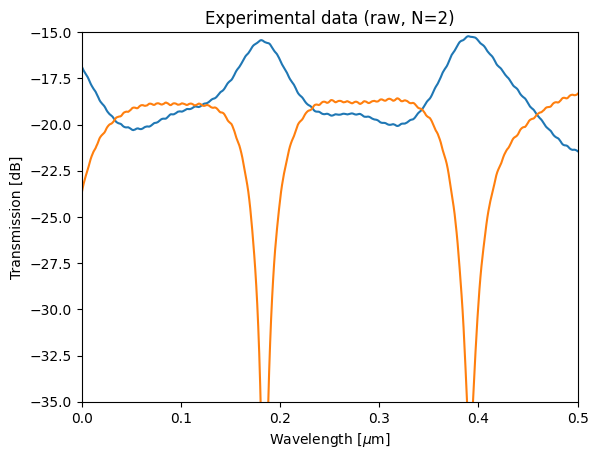

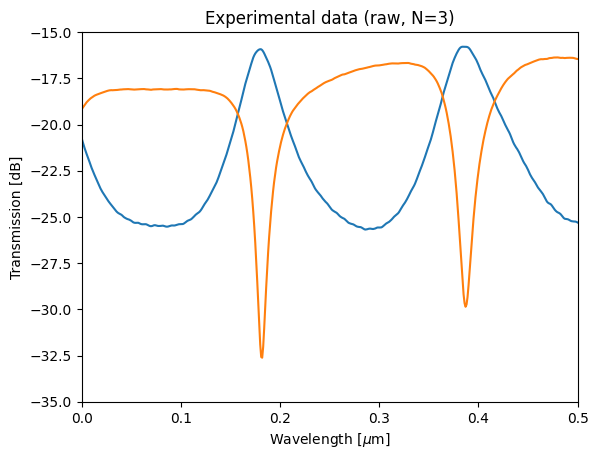

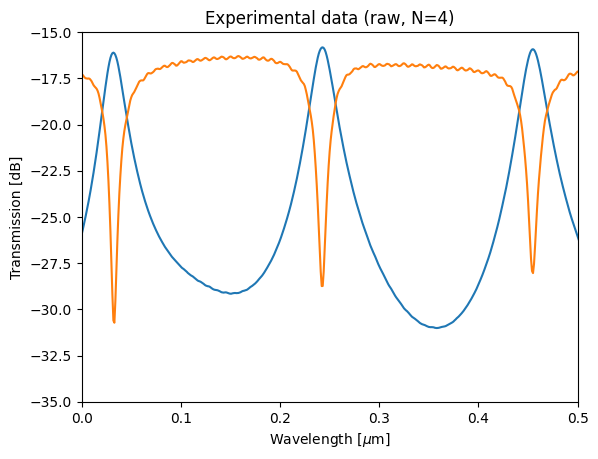

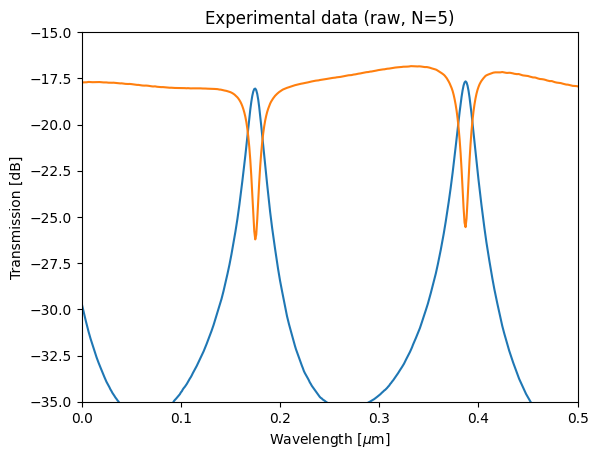

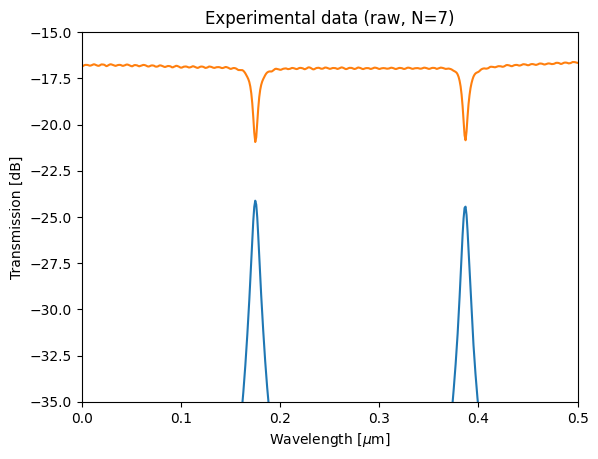

In [61]:
'''
Plot the raw data from the Fabry-Perot cavities
- remove the number 6 which had poor measurement data
- zoom in to 2 FSRs
'''

FileNames =[
            'lukasc_BraggHole2/29-Mar-2022 01.54.33_1.mat',
            'lukasc_BraggHole3/29-Mar-2022 02.07.24_1.mat',
            'lukasc_BraggHole4/29-Mar-2022 02.04.51_1.mat',
            'lukasc_BraggHole5/29-Mar-2022 02.02.18_1.mat',
            'lukasc_BraggHole7/29-Mar-2022 01.57.07_1.mat',
]
    

Nholes = [2,3,4,5,7]

for i in range(len(FileNames)):
    
    f = FileNames[i]
    matData = loadmat(f, squeeze_me=True, struct_as_record=False)

    # Read the experimental data from the MATLAB file
    wavelength = matData['testResult'].header.wavelength  # in nm
    power1 = matData['testResult'].rows.channel_3
    power2 = matData['testResult'].rows.channel_2
    wav0 = 1315

    plt.figure()
    plt.plot(wavelength-wav0, power1, wavelength-wav0, power2)
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Transmission [dB]')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.xlim(0, 0.5)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.ylim(-35, -15)
    plt.title('Experimental data (raw, N=%s)' % Nholes[i])
    #plt.savefig('2.pdf')


3 dB bandwidth: 0.389


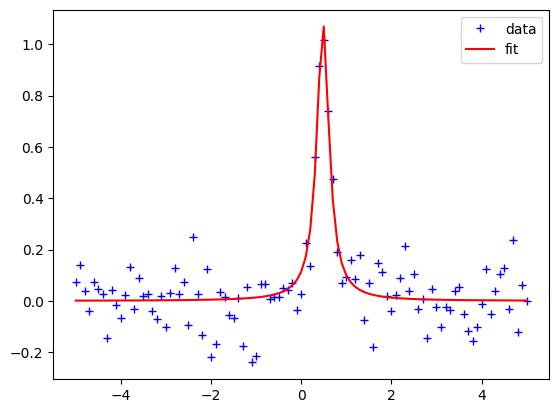

In [62]:
'''
Lukas:
Can you write some Python code that uses numpy to curve fit to a Laurenztian lineshape function, 
and extract the 3 dB bandwidth of a peak?

ChatGPT:
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Lorenztian lineshape function
def lorentzian(x, x0, gamma, A):
    return A / (1 + ((x - x0) / gamma)**2)

# Generate some sample data with noise
xdata = np.linspace(-5, 5, 101)
ydata = lorentzian(xdata, 0.5, 0.2, 1) + np.random.normal(0, 0.1, len(xdata))

# Fit the data to the Lorenztian function using curve_fit
popt, pcov = curve_fit(lorentzian, xdata, ydata)

# Extract the 3 dB bandwidth of the peak
FWHM = 2 * popt[1] * np.sqrt(2*np.log(2))
print("3 dB bandwidth: {:.3f}".format(FWHM))

# Plot the data and the fitted curve
plt.plot(xdata, ydata, 'b+', label='data')
plt.plot(xdata, lorentzian(xdata, *popt), 'r-', label='fit')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Experimental data (raw)')

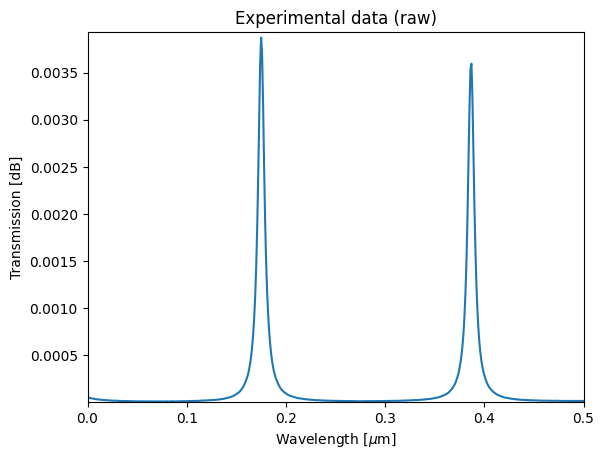

In [63]:
'''
I want to extract only part of the data, i.e., zoom in to one or two peaks

Lukas:
I have a vector with monotonically interesting values, with equal spacing. 
I want to find the indices to the elements for a specified central value, with a certain range.

ChatGPT:
import numpy as np
central_value = 5.0
range = 1.0
# Find the indices of elements within the specified range
indices = np.where((x >= central_value - range) & (x <= central_value + range))[0]
'''

import numpy as np
wav0 = 1315.0
width = 0.5
# Find the indices of elements within the specified range
indices = np.where((wavelength >= wav0 - width) & (wavelength <= wav0 + width))[0]

xdata = wavelength[indices]-wav0
ydata = 10**(power1[indices]/10)
plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission [dB]')
plt.autoscale(enable=True, axis='x', tight=True)
plt.xlim(0, 0.5)
plt.autoscale(enable=True, axis='y', tight=True)
plt.title('Experimental data (raw)')



3 dB bandwidth: -0.000


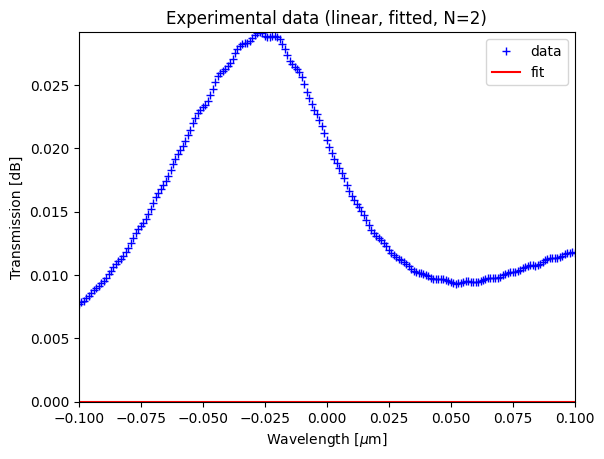

3 dB bandwidth: 0.056


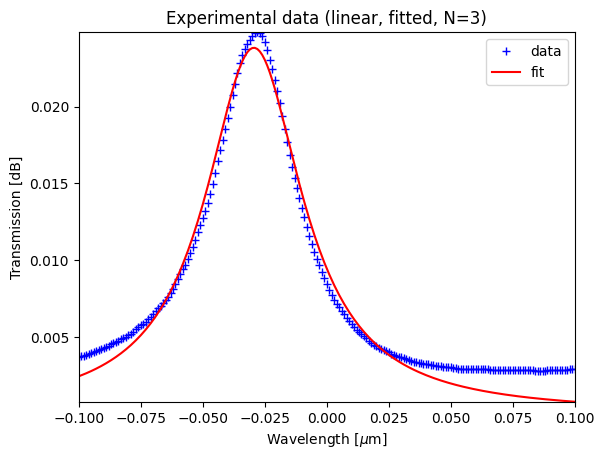

3 dB bandwidth: -0.000


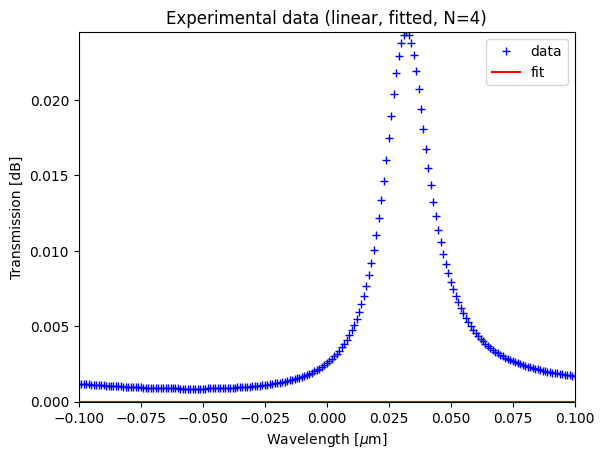

3 dB bandwidth: 0.020


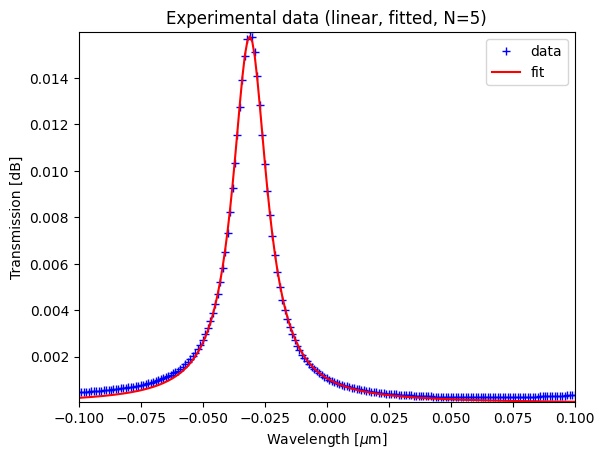

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [64]:
'''
Plot and curvefit the raw data from the Fabry-Perot cavities
- remove the number 6 which had poor measurement data
- zoom in to 2 FSRs
- convert data in dB to linear scale
- Using Lorentzian curve fit routine provided by ChatGPT
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Lorenztian lineshape function
def lorentzian(x, x0, gamma, A):
    return A / (1 + ((x - x0) / gamma)**2)


for i in range(len(FileNames)):
    
    f = FileNames[i]
    matData = loadmat(f, squeeze_me=True, struct_as_record=False)

    # Read the experimental data from the MATLAB file
    wavelength = matData['testResult'].header.wavelength  # in nm
    power1 = matData['testResult'].rows.channel_3
    power2 = matData['testResult'].rows.channel_2
    
    wav0 = 1315.0
    width = 0.1
    # Find the indices of elements within the specified range
    indices = np.where((wavelength >= wav0 - width) & (wavelength <= wav0 + width))[0]

    xdata = wavelength[indices]-wav0
    ydata = 10**(power1[indices]/10)

    # Fit the data to the Lorenztian function using curve_fit
    popt, pcov = curve_fit(lorentzian, xdata, ydata)

    # Extract the 3 dB bandwidth of the peak
    FWHM = 2 * popt[1] * np.sqrt(2*np.log(2))
    print("3 dB bandwidth: {:.3f}".format(FWHM))

    # Plot the data and the fitted curve
    plt.plot(xdata, ydata, 'b+', label='data')
    plt.plot(xdata, lorentzian(xdata, *popt), 'r-', label='fit')
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Transmission [dB]')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.title('Experimental data (linear, fitted, N=%s)' % Nholes[i])
    plt.legend()
    plt.show()

    #plt.savefig('2.pdf')


In [65]:
'''
Lukas: for the Lorenztian fit, can you add a baseline term?

ChatGPT:

Sure, you can modify the Lorenztian function to include a baseline term as follows:

python

def lorentzian(x, x0, gamma, A, B):
    return A / (1 + ((x - x0) / gamma)**2) + B

Here, the additional parameter B represents the baseline. You can then use curve_fit to fit the data to this modified function as before. The popt array returned by curve_fit will now contain four elements, corresponding to the fitted values of x0, gamma, A, and B.

# Fit the data to the modified Lorenztian function using curve_fit
popt, pcov = curve_fit(lorentzian, xdata, ydata, p0=[0, 1, 1, 0])

# Extract the fitted parameters
x0_fit, gamma_fit, A_fit, B_fit = popt

# Extract the 3 dB bandwidth of the peak
FWHM = 2 * gamma_fit * np.sqrt(2*np.log(2))
print("3 dB bandwidth: {:.3f}".format(FWHM))

# Plot the data and the fitted curve
plt.plot(xdata, ydata, 'b+', label='data')
plt.plot(xdata, lorentzian(xdata, *popt), 'r-', label='fit')
plt.legend()
plt.show()

'''

'\nLukas: for the Lorenztian fit, can you add a baseline term?\n\nChatGPT:\n\nSure, you can modify the Lorenztian function to include a baseline term as follows:\n\npython\n\ndef lorentzian(x, x0, gamma, A, B):\n    return A / (1 + ((x - x0) / gamma)**2) + B\n\nHere, the additional parameter B represents the baseline. You can then use curve_fit to fit the data to this modified function as before. The popt array returned by curve_fit will now contain four elements, corresponding to the fitted values of x0, gamma, A, and B.\n\n# Fit the data to the modified Lorenztian function using curve_fit\npopt, pcov = curve_fit(lorentzian, xdata, ydata, p0=[0, 1, 1, 0])\n\n# Extract the fitted parameters\nx0_fit, gamma_fit, A_fit, B_fit = popt\n\n# Extract the 3 dB bandwidth of the peak\nFWHM = 2 * gamma_fit * np.sqrt(2*np.log(2))\nprint("3 dB bandwidth: {:.3f}".format(FWHM))\n\n# Plot the data and the fitted curve\nplt.plot(xdata, ydata, \'b+\', label=\'data\')\nplt.plot(xdata, lorentzian(xdata, *p

3 dB bandwidth: 0.072


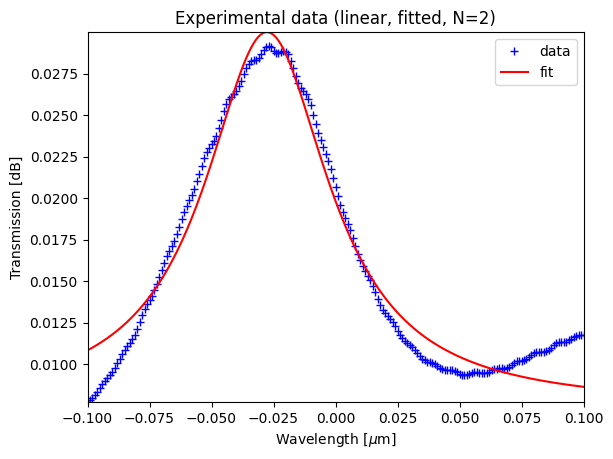

3 dB bandwidth: 0.045


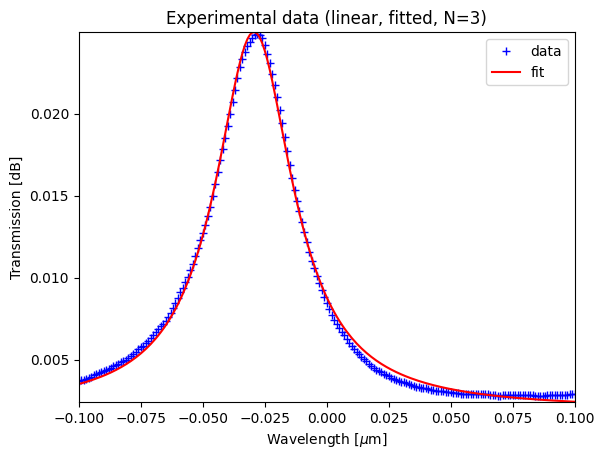

3 dB bandwidth: 0.026


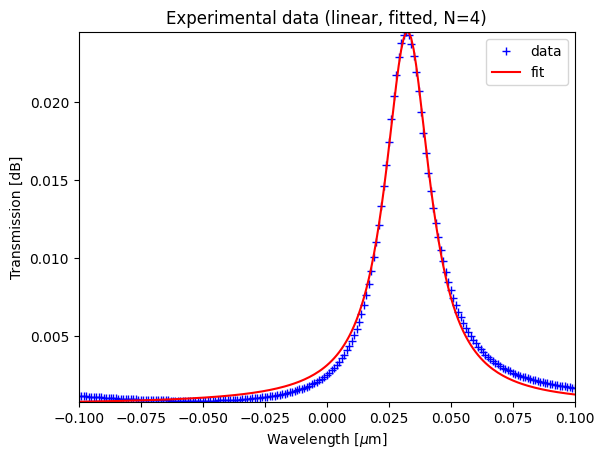

3 dB bandwidth: 0.019


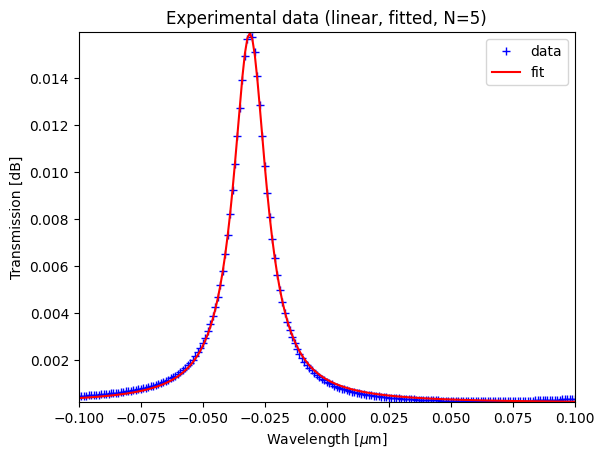

3 dB bandwidth: -0.010


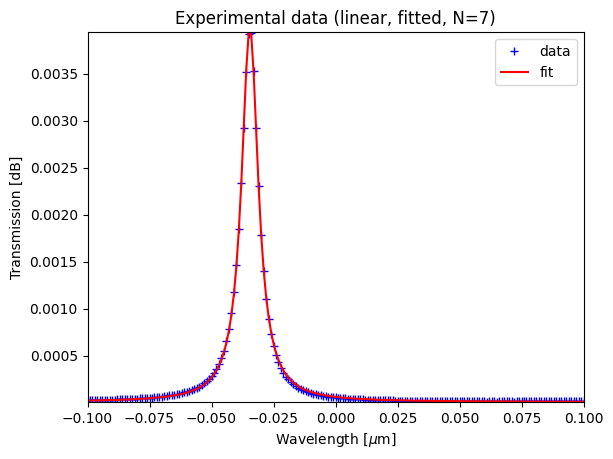

In [73]:
'''
Plot and curvefit the raw data from the Fabry-Perot cavities
- remove the number 6 which had poor measurement data
- zoom in to 2 FSRs
- convert data in dB to linear scale
- Using Lorentzian curve fit routine provided by ChatGPT
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Lorenztian lineshape function
def lorentzian(x, x0, gamma, A, B):
    return A / (1 + ((x - x0) / gamma)**2) + B


# Extract performance parameters from the measurements
Q = []
T = []

for i in range(len(FileNames)):
    
    f = FileNames[i]
    matData = loadmat(f, squeeze_me=True, struct_as_record=False)

    # Read the experimental data from the MATLAB file
    wavelength = matData['testResult'].header.wavelength  # in nm
    power1 = matData['testResult'].rows.channel_3
    power2 = matData['testResult'].rows.channel_2
    
    wav0 = 1315.0
    width = 0.1
    # Find the indices of elements within the specified range
    indices = np.where((wavelength >= wav0 - width) & (wavelength <= wav0 + width))[0]

    xdata = wavelength[indices]-wav0
    ydata = 10**(power1[indices]/10)

    
    # Fit the data to the Lorenztian function using curve_fit
    popt, pcov = curve_fit(lorentzian, xdata, ydata, p0=[0, 0.1, max(ydata), 0])

    # Extract the fitted parameters
    x0_fit, gamma_fit, A_fit, B_fit = popt

    # Extract the 3 dB bandwidth of the peak
    FWHM = 2 * popt[1] * np.sqrt(2*np.log(2))
    print("3 dB bandwidth: {:.3f}".format(FWHM))
    Q.append ( wav0/np.abs(FWHM) )
    T.append ( max(ydata) )

    # Plot the data and the fitted curve
    plt.plot(xdata, ydata, 'b+', label='data')
    plt.plot(xdata, lorentzian(xdata, *popt), 'r-', label='fit')
    plt.xlabel('Wavelength [$\mu$m]')
    plt.ylabel('Transmission [dB]')
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.title('Experimental data (linear, fitted, N=%s)' % Nholes[i])
    plt.legend()
    plt.savefig('SpectrumFitted_%s_Holes.pdf' % Nholes[i])
    plt.show()




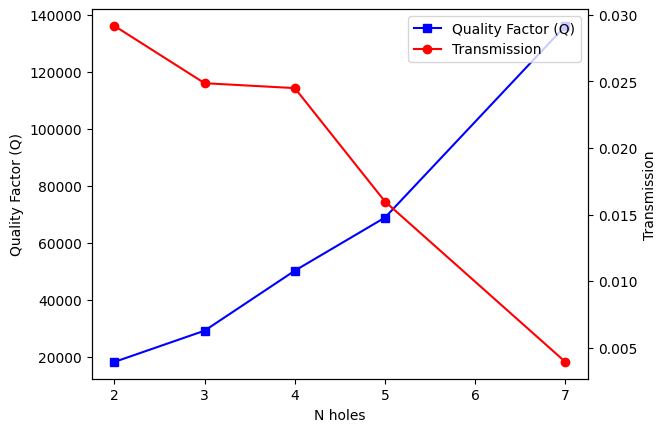

In [75]:
'''
Plot the Q and T versus N holes.

Lukas: Using matplotlib, I want a plot with two separate y-axis, both auto scaled.

'''
# Create a figure with two axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the data on the two axes
ax1.plot(Nholes, Q, 'b-s', label='Quality Factor (Q)')
ax2.plot(Nholes, T, 'r-o', label='Transmission')

# Set the labels for the axes
ax1.set_xlabel('N holes')
ax1.set_ylabel('Quality Factor (Q)')
ax2.set_ylabel('Transmission')

# Add a legend for the lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Show the plot
plt.savefig('Q_vs_Holes.pdf')
plt.show()

